C:\Users\SEC\AppData\Local\Temp\ipykernel_16400\2500061552.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


Epoch 1/2000
24/24 [==============================] - 1s 10ms/step - loss: 1.3912 - accuracy: 0.2756 - val_loss: 1.3524 - val_accuracy: 0.3298
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3215 - accuracy: 0.3663 - val_loss: 1.3061 - val_accuracy: 0.3762
Epoch 3/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.2806 - accuracy: 0.4015 - val_loss: 1.2784 - val_accuracy: 0.4064
Epoch 4/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.2594 - accuracy: 0.4062 - val_loss: 1.2678 - val_accuracy: 0.4085
Epoch 5/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.2528 - accuracy: 0.4137 - val_loss: 1.2620 - val_accuracy: 0.4170
Epoch 6/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.2438 - accuracy: 0.4181 - val_loss: 1.2600 - val_accuracy: 0.4133
Epoch 7/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.2382 - accuracy: 0.4309 - val_loss: 1.2511 - val_accuracy: 0.4294
Epoch

C:\Users\SEC\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NameError: name 'X_train_scaled' is not defined

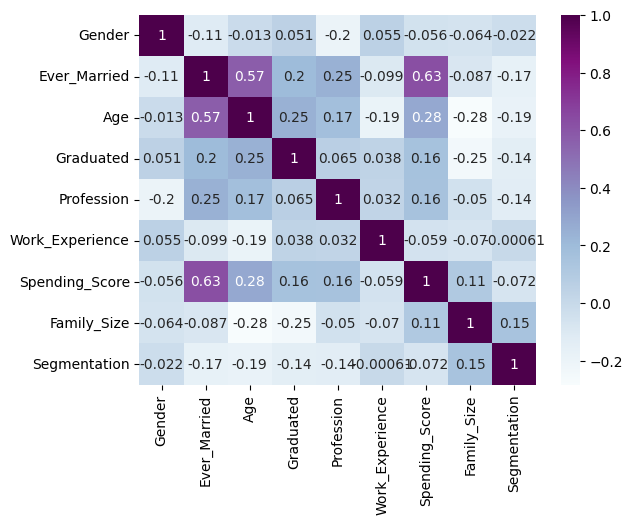

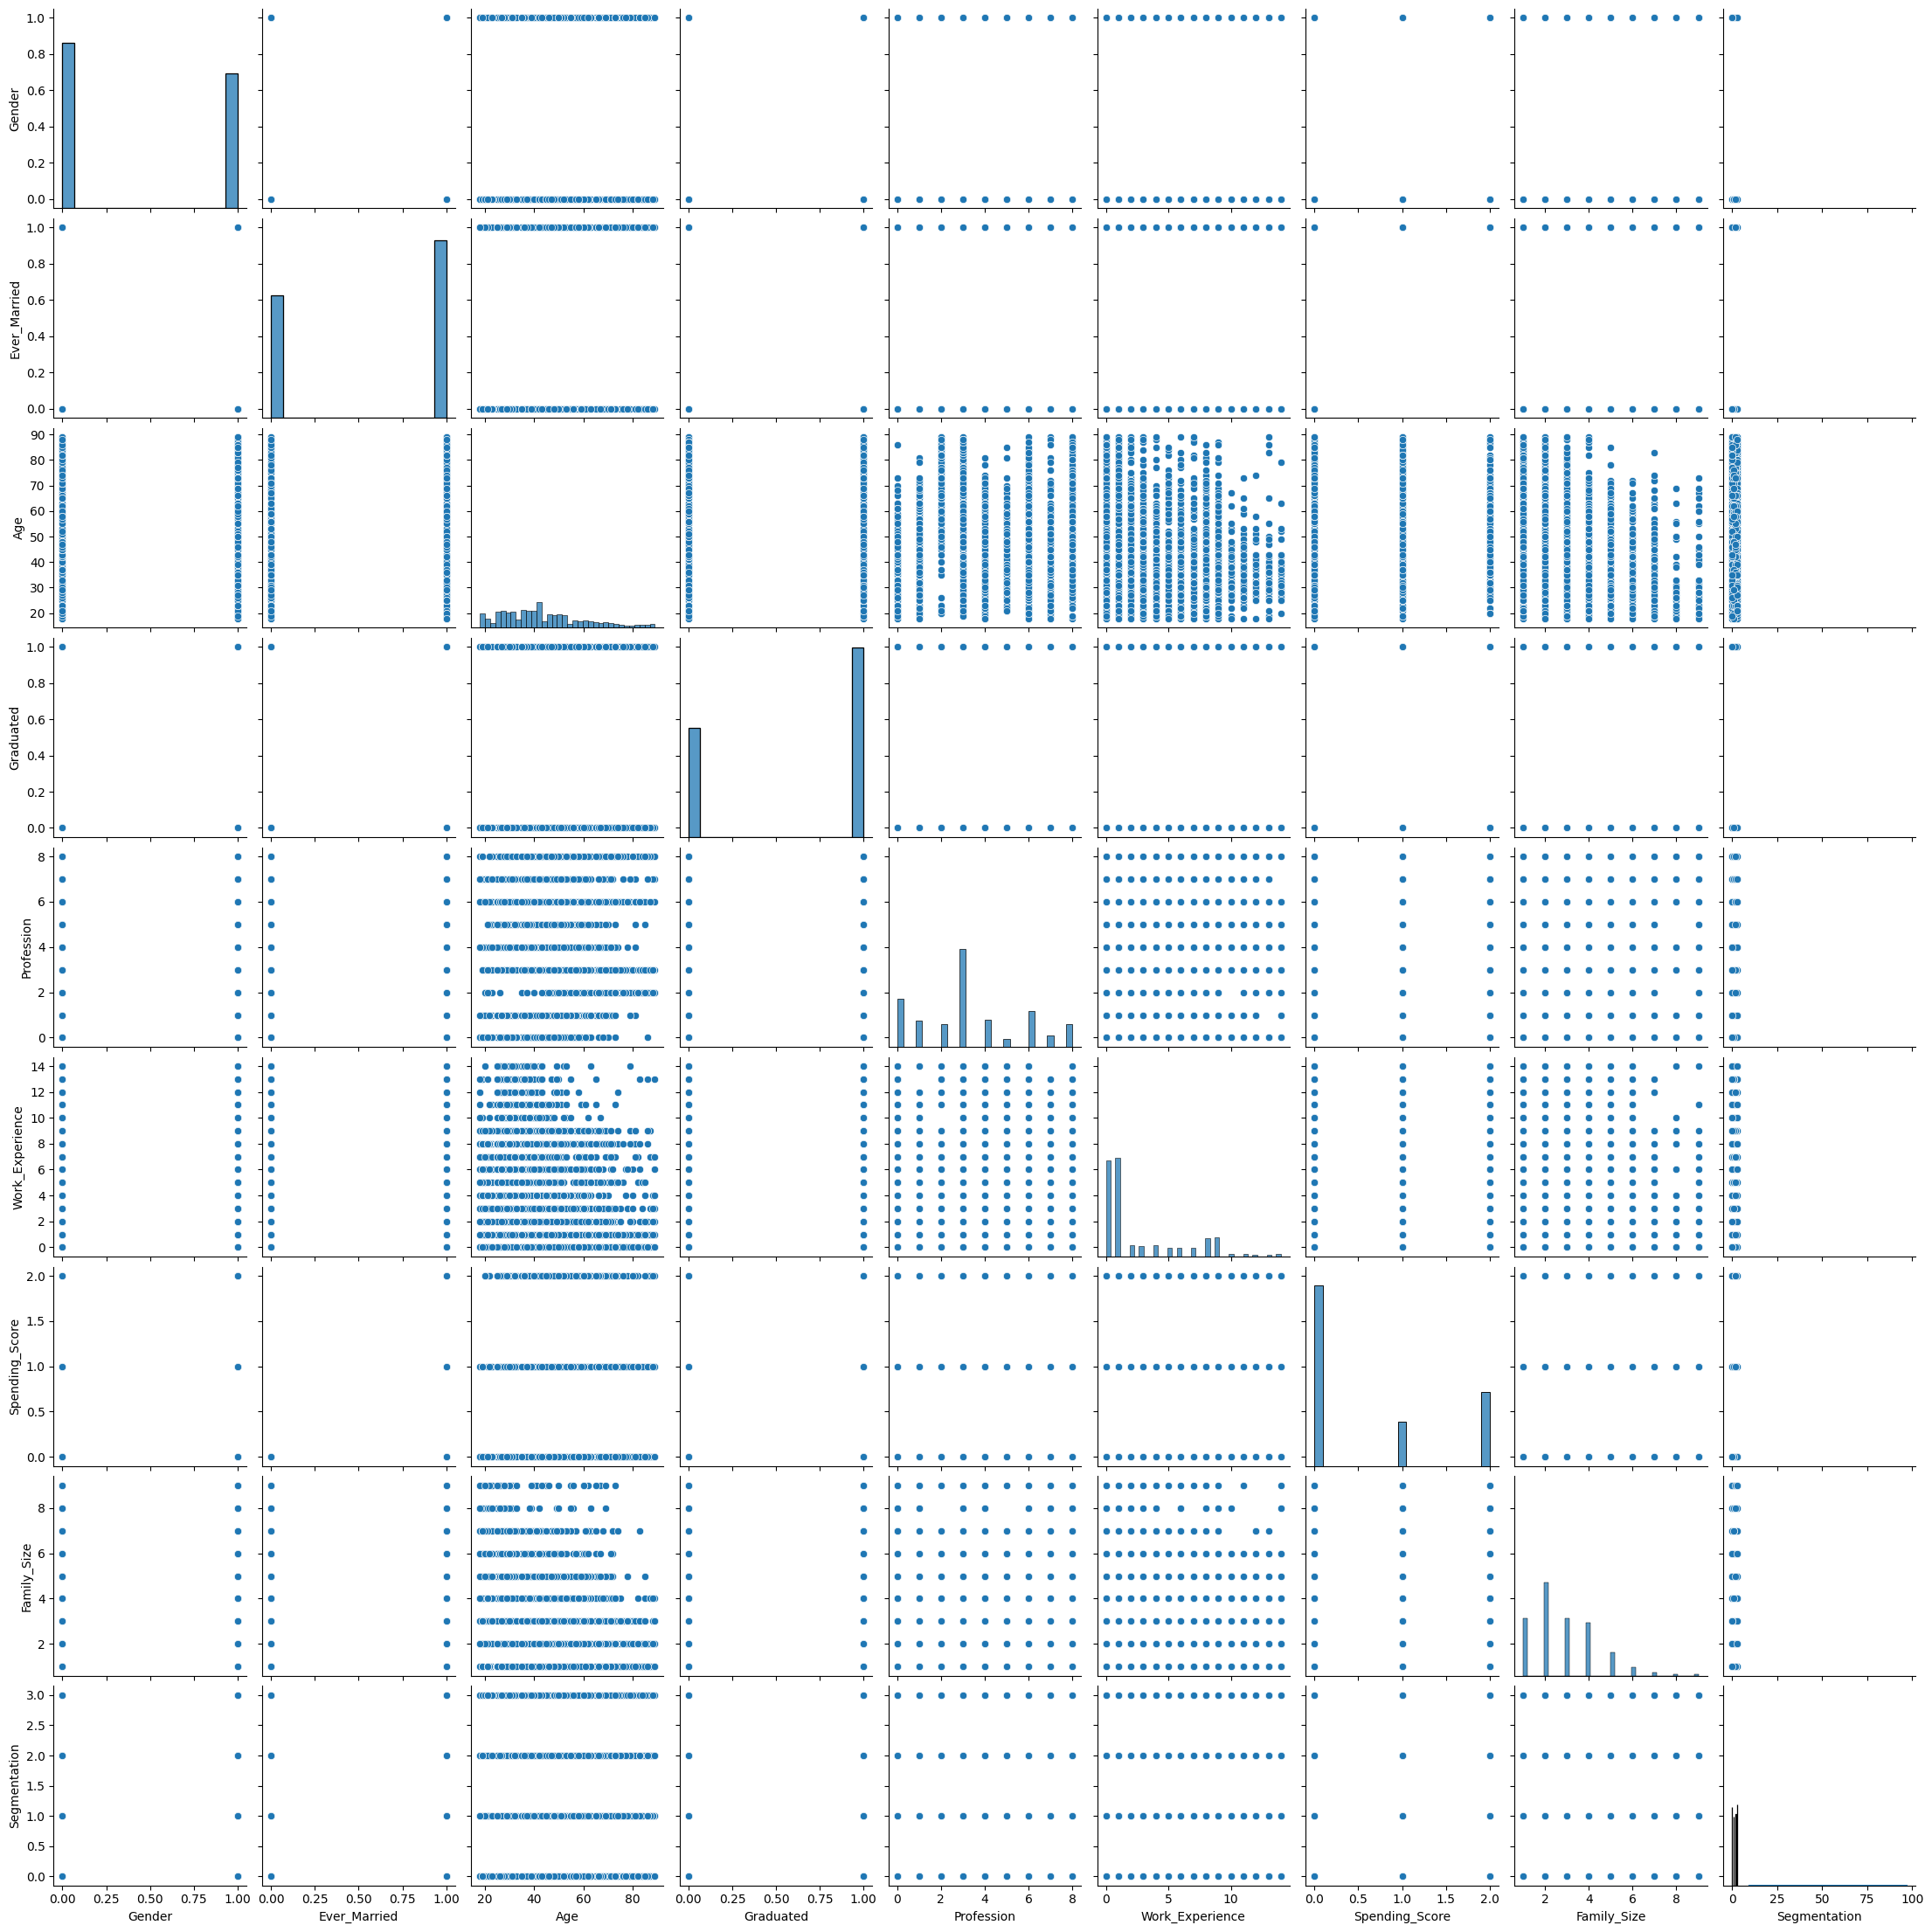

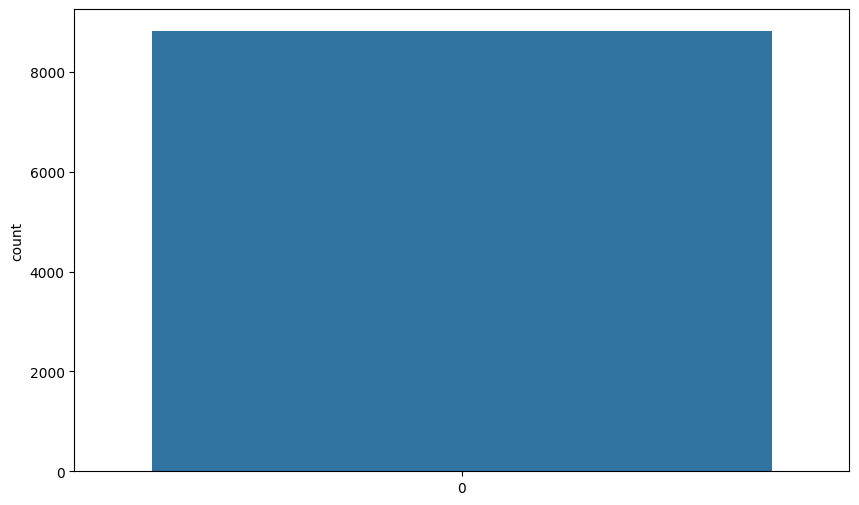

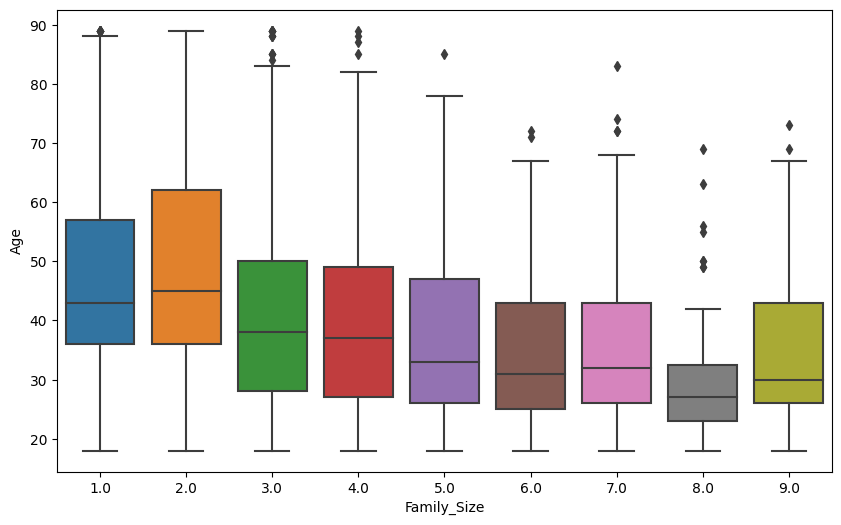

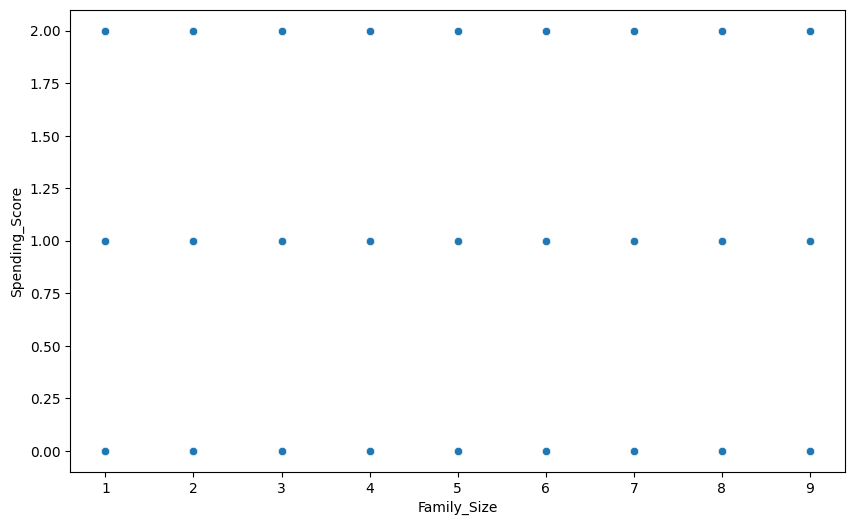

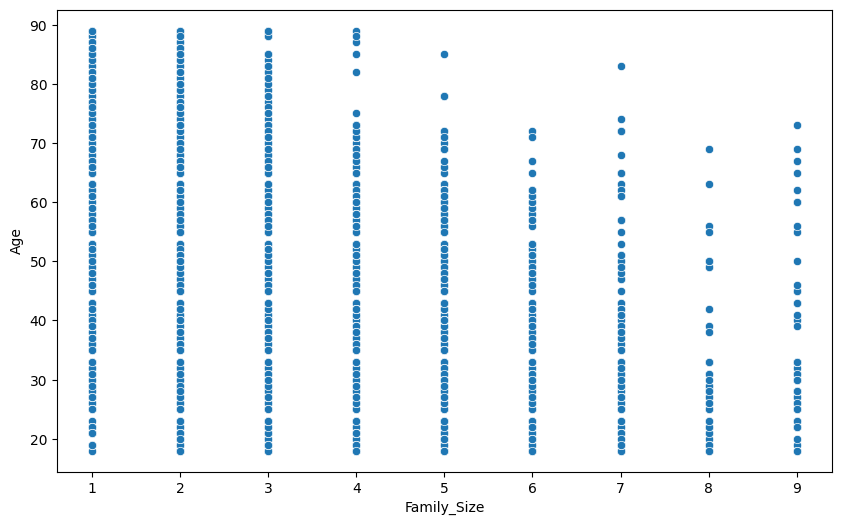

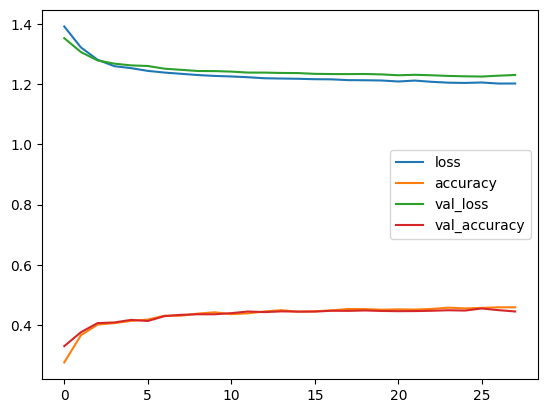

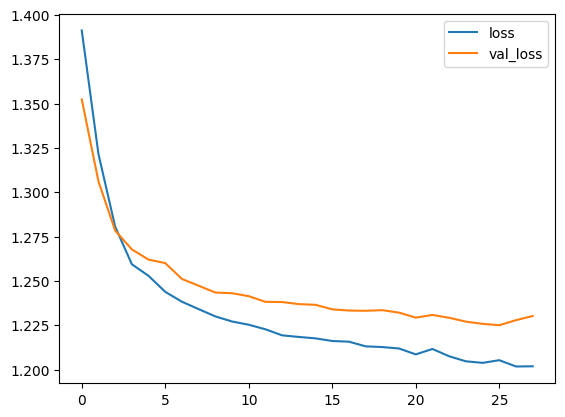

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt
df=pd.read_csv("customers.csv")
df.head(15)
df.columns
df.dtypes
df.shape
df.isnull().sum()
df_clean=df.dropna(axis=0)
df_clean.isnull().sum()
df_clean.shape
df_clean.dtypes
df_clean['Gender'].unique()
df_clean['Ever_Married'].unique()
df_clean['Graduated'].unique()
df_clean['Profession'].unique()
df_clean['Spending_Score'].unique()
df_clean['Var_1'].unique()
df_clean['Segmentation'].unique()
category_list=[
    ['Male', 'Female'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
      'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
     ['Low', 'High', 'Average']
]
enc = OrdinalEncoder(categories=category_list)
df1=df_clean.copy()
df1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(df1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])
df1.dtypes
le = LabelEncoder()
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])
df1.dtypes
df1 = df1.drop('ID',axis=1)
df1 = df1.drop('Var_1',axis=1)
df1.dtypes
corr = df1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)
sns.pairplot(df1)
sns.distplot(df1['Age'])
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(df1['Family_Size'])
plt.figure(figsize=(10,6))
sns.boxplot(x='Family_Size',y='Age',data=df1)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=df1)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=df1)
df1.describe()
df1['Segmentation'].unique()
x=df1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values
y1 = df1[['Segmentation']].values
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y1)
y1.shape
y = one_hot_enc.transform(y1).toarray()
y.shape
y1[0]
y[0]
x.shape
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.33,
                                               random_state=50)
x_train[0]  
x_train.shape
scaler_age = MinMaxScaler()
scaler_age.fit(x_train[:,2].reshape(-1, 1))
x_train_scaled = np.copy(x_train)
x_test_scaled = np.copy(x_test)
x_train_scaled.shape
# To scale the Age column
x_train_scaled[:,2] = scaler_age.transform(x_train[:,2].reshape(-1, 1)).reshape(-1)
x_test_scaled[:,2] = scaler_age.transform(x_test[:,2].reshape(-1,1)).reshape(-1)

# Creating the model

ai_brain = Sequential([
     Dense(8,input_shape=[8]),
     Dense(16,activation='relu'),
    Dense(32,activation='tanh'),
    Dense(16,activation='relu'),
       
     Dense(4,activation='softmax'),
  
])

ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
                 
early_stop = EarlyStopping(monitor='val_loss', patience=2)  

ai_brain.fit(x_train_scaled,y_train,
             epochs=2000,batch_size=256,
             validation_data=(x_test_scaled,y_test),
             callbacks=[early_stop]
             )
             
metrics = pd.DataFrame(ai_brain.history.history)
metrics.head()
metrics.plot()
x_test_predictions = np.argmax(ai_brain.predict(x_test_scaled), axis=1)
x_test_predictions.shape
y_test_truevalue = np.argmax(y_test,axis=1)
y_test_truevalue.shape
print(confusion_matrix(y_test_truevalue,x_test_predictions))
print(classification_report(y_test_truevalue,x_test_predictions))

# Saving the Model
ai_brain.save('customer_classification_model.h5')

# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le], fh)
   
# Loading the Model
ai_brain = load_model('customer_classification_model.h5')

# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)
   
 
x_single_prediction = np.argmax(ai_brain.predict(x_test_scaled[1:2,:]), axis=1)
print(x_single_prediction)
print(le.inverse_transform(x_single_prediction))